In [1]:
# Подключенине библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import sys
sys.path.append('custom_modules')

import Data_processing as dp

from matplotlib import ticker, rc, rcParams
from IPython.display import display
from tensorflow import keras

In [2]:
# Пути к обработанным данным
# Путь к X части выборки с массивами в каждой ячейке
# Run1 - данные обучающей выборки
# Run2 - данные тестовой выборки
path_to_array_like_X_data = 'data/Prepared data/Run2/X_data_array_like.xlsx'
# Путь к Y части выборки
path_to_Y_data = 'data/Prepared data/Run2/Y_data(binary_classification).xlsx'

#val_count = 8

In [3]:
X_df =  dp.get_array_like_X_df(path_to_array_like_X_data)
Y_df =  dp.get_Y_df(path_to_Y_data)

In [4]:
#X_df = X_df.drop(columns = ['detector_155','detector_182','detector_222'], axis = 1)
X_df['detector_155'] = X_df['detector_154']
X_df['detector_182'] = X_df['detector_181']
X_df['detector_222'] = X_df['detector_221']
#Y_df = Y_df.drop(columns = ['detector_155','detector_182','detector_222'], axis = 1)

In [5]:
print(X_df.shape)
print(Y_df.shape)

(115, 400)
(115, 400)


In [5]:
row = 0 #24
col = 2 #20

In [6]:
X_df.iloc[row,col][:32]

array([25.1, 25.3, 25.5, 25.6, 25.9, 26. , 26.1, 26.5, 26.6, 28.5, 28.6,
       28.7, 28.9, 29. , 29.1, 29.9, 30. , 31.5, 31.6, 31.7, 31.9, 32. ,
       32.9, 34.6, 34.7, 34.9, 35. , 35.1, 37.8, 38. , 40.9,  0. ])

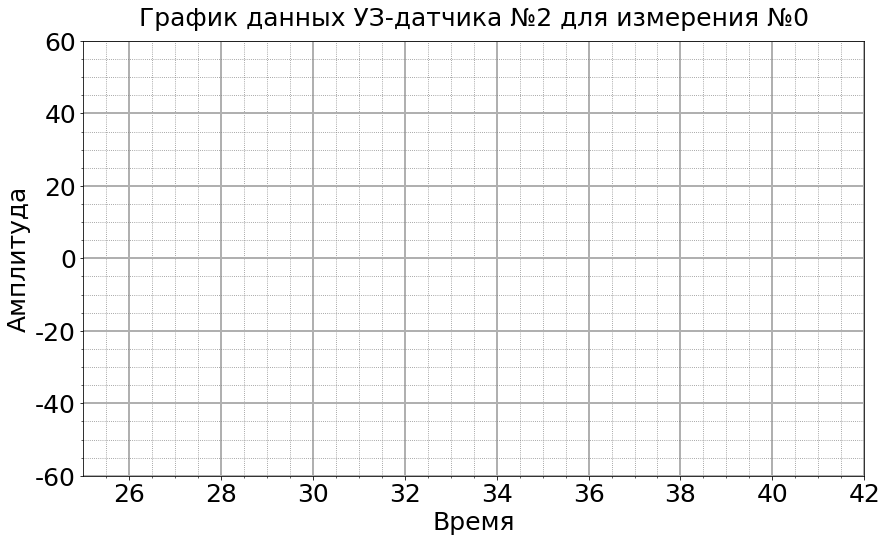

In [7]:
fig, ax = plt.subplots()

##59ecff

fig.set_figwidth(14) #14 18 26
fig.set_figheight(8)

#ax.plot(X_df.iloc[row,col][:31],X_df.iloc[0,0][32:-1],
#        marker='o', markerfacecolor='#88ff59',
#        markersize=12.0)

ax.set_xlabel('Время', fontsize=25)
ax.set_ylabel('Амплитуда', fontsize=25)
ax.set_title(f"График данных УЗ-датчика №{col} для измерения №{row}", 
             fontsize=25, pad=15)

#ax.patch.set_alpha(0)

ax.set_xlim([25, 42])
ax.set_ylim([-60, 60])

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

#  Устанавливаем форматирование чисел основных делений:
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))

#  Устанавливаем форматирование делений:
ax.tick_params(axis='both', which='both', labelsize = 25)
#ax.tick_params(axis='x', labelrotation = 45)

# Вывод и настройка сетки
ax.minorticks_on()
ax.grid(which='major', linewidth=2)
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.show()

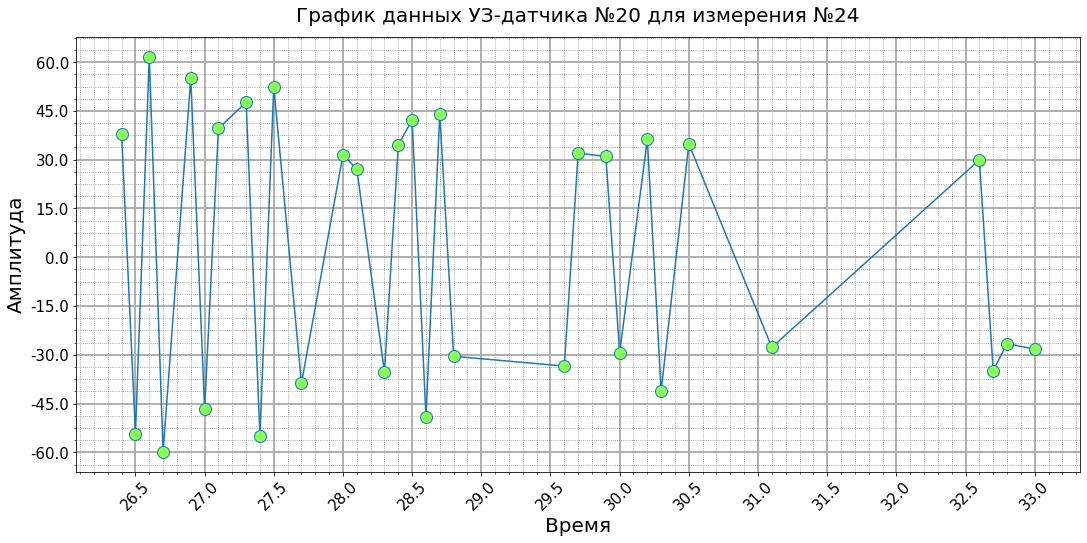

In [13]:
fig, ax = plt.subplots()

##59ecff

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(X_df.iloc[row,col][:31],X_df.iloc[0,0][32:-1],
        marker='o', markerfacecolor='#88ff59',
        markersize=12.0)

ax.set_xlabel('Время', fontsize=20)
ax.set_ylabel('Амплитуда', fontsize=20)
ax.set_title(f"График данных УЗ-датчика №{col} для измерения №{row}", 
             fontsize=20, pad=15)

ax.patch.set_alpha(0)

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(1/2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(15))

#  Устанавливаем форматирование чисел основных делений:
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

#  Устанавливаем форматирование делений:
ax.tick_params(axis='both', which='both', labelsize = 15)
ax.tick_params(axis='x', labelrotation = 45)

# Вывод и настройка сетки
ax.minorticks_on()
ax.grid(which='major', linewidth=2)
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.show()

In [ ]:
fig, ax = plt.subplots()

##59ecff

fig.set_figwidth(18)
fig.set_figheight(6)

ax.plot(X_df.iloc[0,0][:31],X_df.iloc[0,0][32:-1], 
        marker='o', markerfacecolor='#88ff59', 
        markeredgecolor='white', color='white',
        markersize=12.0, markeredgewidth=2.5,
        linewidth=2.5)

# activate latex text rendering
rc('font', weight='bold')

rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

ax.set_xlabel('Время', fontsize=20, color='white', fontweight='bold')
ax.set_ylabel('Амплитуда', fontsize=20, color='white', fontweight='bold')
ax.set_title(f"График, построенный по данным 1 УЗ-датчика для 1 измерения", 
             fontsize=25, color='white', fontweight='bold')

ax.patch.set_alpha(0)

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(15))

#  Устанавливаем форматирование чисел основных делений:
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

#  Устанавливаем форматирование делений:
ax.tick_params(axis='both', which='both', labelsize = 15, 
               colors='white')
ax.tick_params(axis='x', labelrotation = 45)

# Вывод и настройка сетки
ax.minorticks_on()
ax.grid(which='both', color = 'white', alpha=0.5)
ax.grid(which='minor')
ax.grid(which='major', linewidth=2)
ax.spines[:].set_color('white')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

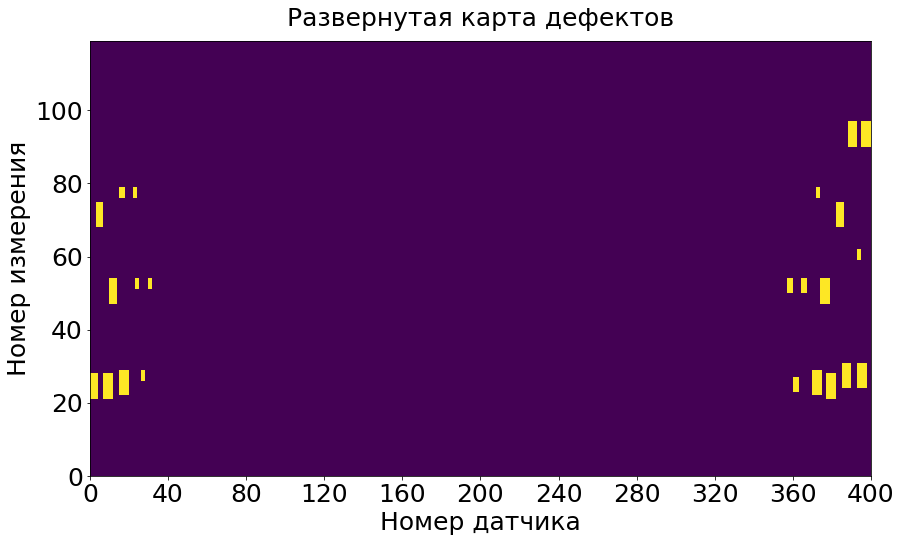

In [8]:
fig, ax = plt.subplots()

fig.set_figwidth(14) # 14 18 26
fig.set_figheight(8)

ax.set_xlabel('Номер датчика', fontsize=25)
ax.set_ylabel('Номер измерения', fontsize=25)
ax.set_title(f"Развернутая карта дефектов", 
             fontsize=25, pad=15)

ax.patch.set_alpha(0)

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(40))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

#  Устанавливаем форматирование чисел основных делений:
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))

#  Устанавливаем форматирование делений:
ax.tick_params(axis='both', which='both', labelsize = 25)
#ax.tick_params(axis='x', top=True, labeltop=True)
#ax.tick_params(axis='x', labelrotation = 45)

#ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

#ax.xaxis.tick_top()

ax.pcolormesh(Y_df)
#ax.invert_yaxis()

plt.show()

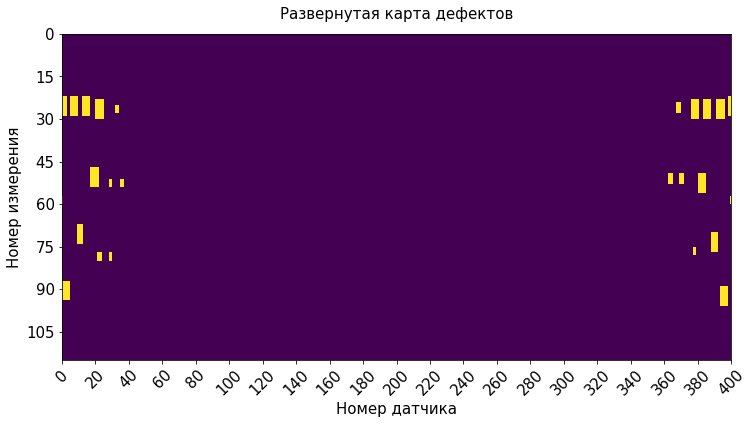

In [19]:
time_number = 0

fig, axes = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

axes.set_xlabel('Номер датчика', fontsize=15) 
axes.set_ylabel('Номер измерения', fontsize=15) 
axes.set_title(f'Развернутая карта дефектов', fontsize=15, pad=15) 

#  Устанавливаем интервал основных делений: 
axes.xaxis.set_major_locator(ticker.MultipleLocator(20)) 
axes.yaxis.set_major_locator(ticker.MultipleLocator(15)) 

#  Устанавливаем форматирование чисел основных делений: 
axes.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 
axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 

#  Устанавливаем форматирование делений: 
axes.xaxis.set_tick_params(which = 'both', labelsize=15) 
axes.yaxis.set_tick_params(which = 'both', labelsize=15) 
axes.xaxis.set_tick_params(which = 'major', labelrotation=45) 

axes.pcolormesh(Y_df)
axes.invert_yaxis()

plt.show()

In [ ]:
time_number = 0

fig, axes = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(6)

temp = np.zeros(X_df.shape)

axes.set_xlabel('Номер датчика', fontsize=15) 
axes.set_ylabel('Номер измерения', fontsize=15) 
axes.set_title(f'Развернутая карта высот для значения времени №{time_number}', fontsize=15, pad=15) 

#  Устанавливаем интервал основных делений: 
axes.xaxis.set_major_locator(ticker.MultipleLocator(20)) 
axes.yaxis.set_major_locator(ticker.MultipleLocator(15)) 

#  Устанавливаем форматирование чисел основных делений: 
axes.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 
axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 

#  Устанавливаем форматирование делений: 
axes.xaxis.set_tick_params(which = 'both', labelsize=15) 
axes.yaxis.set_tick_params(which = 'both', labelsize=15) 
axes.xaxis.set_tick_params(which = 'major', labelrotation=45) 

for i in range(temp.shape[0]):
    for j in range(temp.shape[1]):
        temp[i,j] = X_df.iloc[i,j][time_number]

axes.pcolormesh(temp)
axes.invert_yaxis()

plt.show()

In [ ]:
time_number = 0

fig, axes = plt.subplots()

fig.set_figwidth(6)
fig.set_figheight(6)

temp = np.zeros((X_df.shape[0],40))

axes.set_xlabel('Номер датчика', fontsize=15) 
axes.set_ylabel('Номер измерения', fontsize=15) 
axes.set_title(f'Часть карты в приближении', fontsize=15, pad=15) 

#  Устанавливаем интервал основных делений: 
axes.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
axes.yaxis.set_major_locator(ticker.MultipleLocator(15)) 

#  Устанавливаем форматирование чисел основных делений: 
axes.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 
axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 

#  Устанавливаем форматирование делений: 
axes.xaxis.set_tick_params(which = 'both', labelsize=15) 
axes.yaxis.set_tick_params(which = 'both', labelsize=15) 
axes.xaxis.set_tick_params(which = 'major', labelrotation=45) 

for i in range(temp.shape[0]):
    for j in range(temp.shape[1]):
        temp[i,j] = X_df.iloc[i,j][time_number]

axes.pcolormesh(temp)
axes.invert_yaxis()

plt.show()

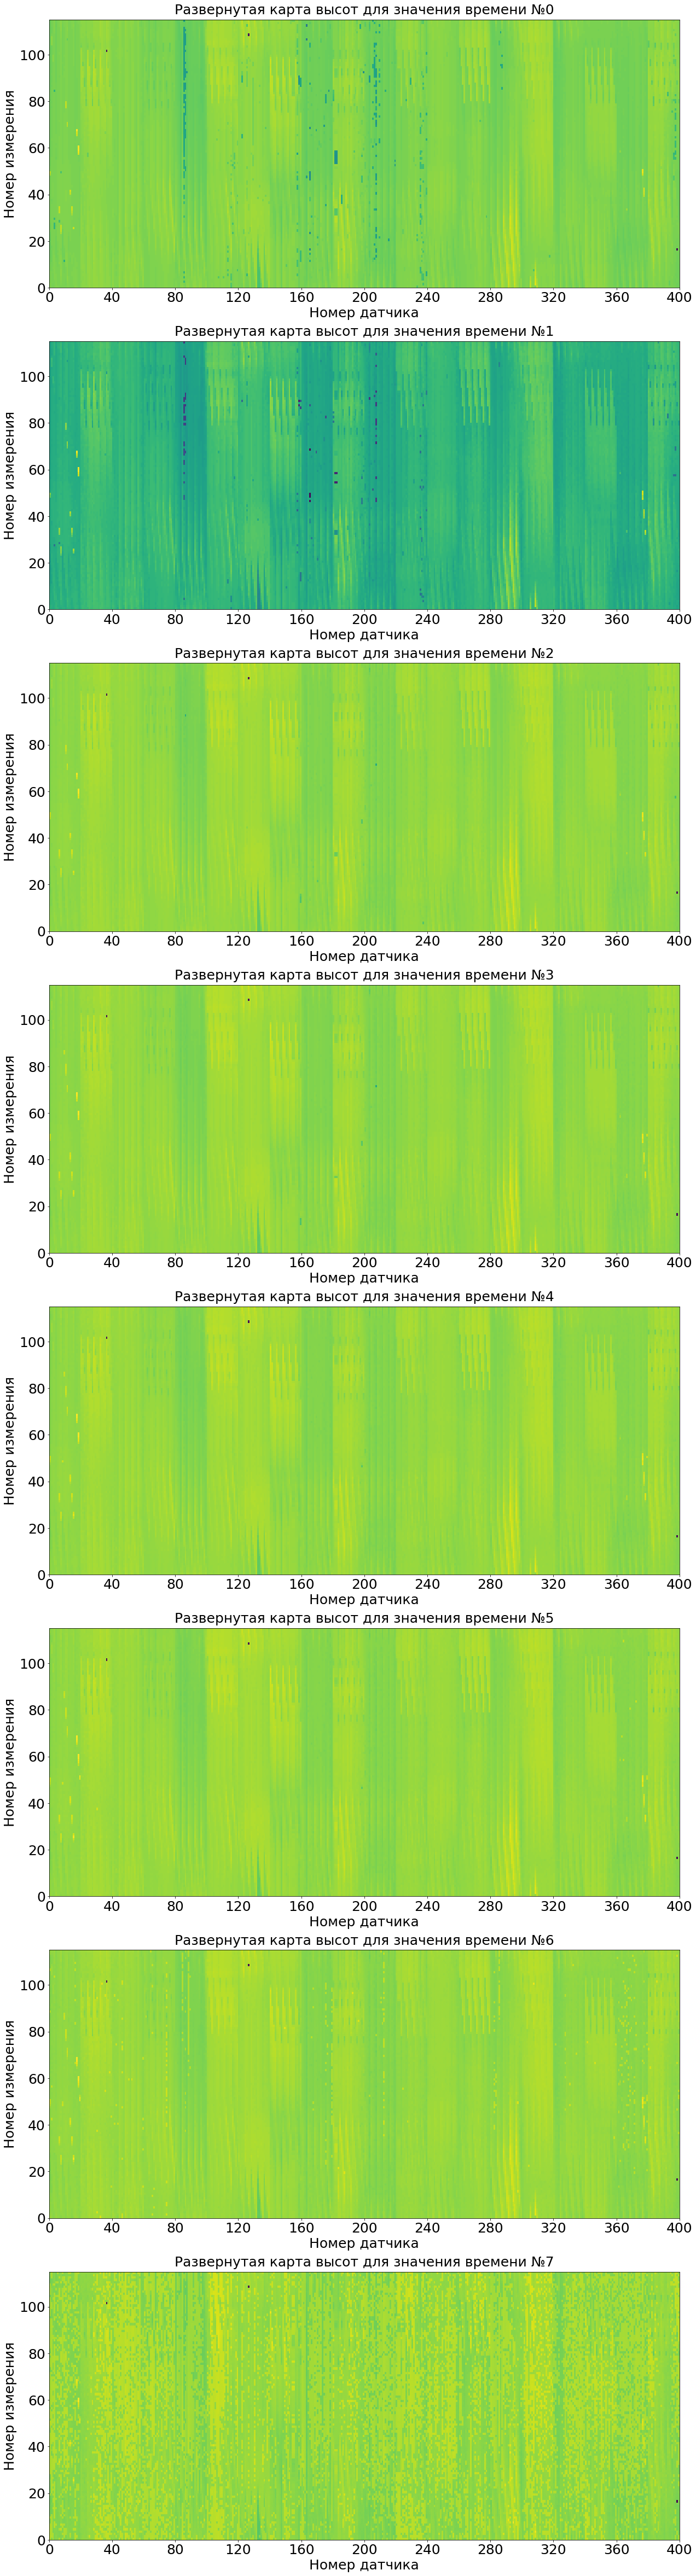

In [5]:
val_count = 8

fig, axes = plt.subplots(val_count)

fig.set_figwidth(16)
fig.set_figheight(val_count*8)

temp = np.zeros(X_df.shape)

for ax, iterator in zip(axes, range(val_count)):
    ax.set_xlabel('Номер датчика', fontsize=25) 
    ax.set_ylabel('Номер измерения', fontsize=25) 
    ax.set_title(f'Развернутая карта высот для значения времени №{iterator}', 
                 fontsize=25, pad=10) 
    
    #  Устанавливаем интервал основных делений: 
    ax.xaxis.set_major_locator(ticker.MultipleLocator(40)) 
    ax.yaxis.set_major_locator(ticker.MultipleLocator(20)) 

    #  Устанавливаем форматирование чисел основных делений: 
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 

    #  Устанавливаем форматирование делений: 
    ax.tick_params(axis='both', which='both', labelsize = 25)

    #ax.xaxis.tick_top()
    ax.patch.set_alpha(0)
    
    for i in range(temp.shape[0]):
        for j in range(temp.shape[1]):
            temp[i,j] = X_df.iloc[i,j][iterator]
    
    ax.pcolormesh(temp)
    #ax.invert_yaxis()
    
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.2) 
plt.show()